# Boston AirBNB Dataset Analysis

Using the Boston AirBNB Dataset I will answer the following questions:

1. What are the main characteristics of the AirBNB listings in Boston?
2. Which variables can determine the price of an AirBNB listing?
3. When is the best time of the year to find available properties in Boston?

## Business Understanding

AirBNB is an American vacation rental online marketplace. This company acts as a broker, receiving comission from each booking. 

## Data Understanding

### Get the data

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')
sns.set(style = 'darkgrid')

Once we have imported our datasets, let's take a quick look to each one of them in order to define how we can aswer our three questions

In [400]:
## Take a first look into "listings" dataset
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [401]:
# How many rows and columns are present in the "listings" dataset?
listings.shape

(3585, 95)

In [402]:
## Review the names and datatypes of each column in the "listings" dataset
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

This dataset will help us answer questions 1 and 2. There are many columns with NaN values. However, we will handle this cases depending on how we analyze each variable later.

In [403]:
## Take a first look into the "calendar" dataset
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [404]:
## Review the names and datatypes of each column in the "calendar" dataset
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


This dataset will help us answer question 3. We will not be using price to answer this question. So, there is no problem with the null values. 

In [405]:
## Take a first look into "reviews" dataset
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [406]:
## Review the names and datatypes of each column in the "reviews" dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


We will not use the "reviews" dataset in this notebook. However, it provides very insightful information about the experiences of the customers in each listing. We could use this information in a future analysis by performing some sentiment to this dataset.

After taking a first look into each dataset, we will start answering each question

## Question 1: What are the main characteristics of the AirBNB listings in Boston?

For this section we will only work with the "listing" dataset. First, we will make some data exploration to understand the information in this dataset and have a better perspective of the listings.

### Neighbourhoods: Which offer more listings and how are they distributed among Boston?

Let's see first which are the neighbourhoods with more supply

In [407]:
## Ranking listings by neighbourhood
listings['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Somerville             13
Financial District     13
Leather District        8
Brookline               8
Downtown                8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

We can see here that the leading category in "neighbourhood" is Allston-Brighton. However, this name is a combination of two differente neighbourhoods. Probably we should work with "neighbourhood_cleansed" to have bettter insights.

In [408]:
## Set an order to plot neighbourhood
n_order = listings['neighbourhood_cleansed'].value_counts().index
n_order

Index(['Jamaica Plain', 'South End', 'Back Bay', 'Fenway', 'Dorchester',
       'Allston', 'Beacon Hill', 'Brighton', 'South Boston', 'Downtown',
       'East Boston', 'Roxbury', 'North End', 'Mission Hill', 'Charlestown',
       'South Boston Waterfront', 'Chinatown', 'Roslindale', 'West End',
       'West Roxbury', 'Hyde Park', 'Mattapan', 'Bay Village',
       'Longwood Medical Area', 'Leather District'],
      dtype='object')

Now we have a better on this, let's make a plot of this ranking. 

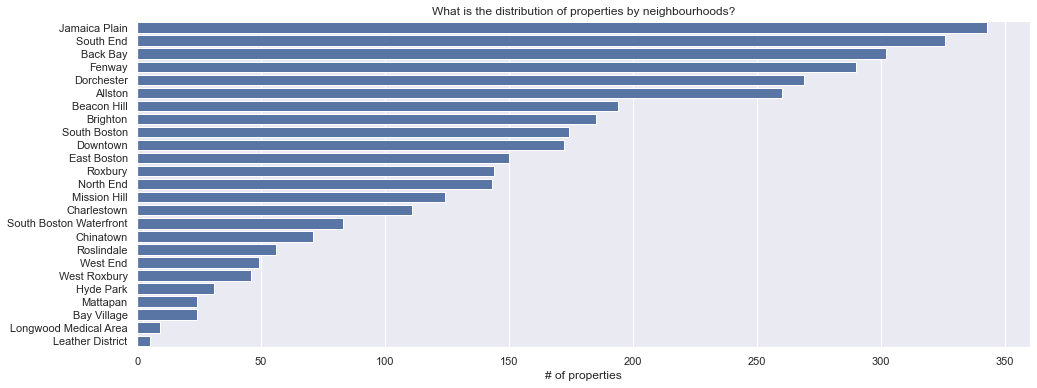

In [409]:
## Plot neighbourhood_cleansed
plt.figure(figsize = (16,6))
sns.countplot(y = 'neighbourhood_cleansed', order = n_order, color = 'b', data = listings)
plt.title('What is the distribution of properties by neighbourhoods?')
plt.ylabel('')
plt.xlabel('# of properties');

We can see that Jamaica Plain, South End, Back Bay, Fenway, Dorchester and Allston are neighbourhoods with a a high supply of properties to rent. However, I wonder if this are the best neighbourhoods to stay. Let's take a look to some of the main features of listings, "property_type","room_type" and "price".

## Type of properties

In [410]:
## Rank listings by type of property
listings['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

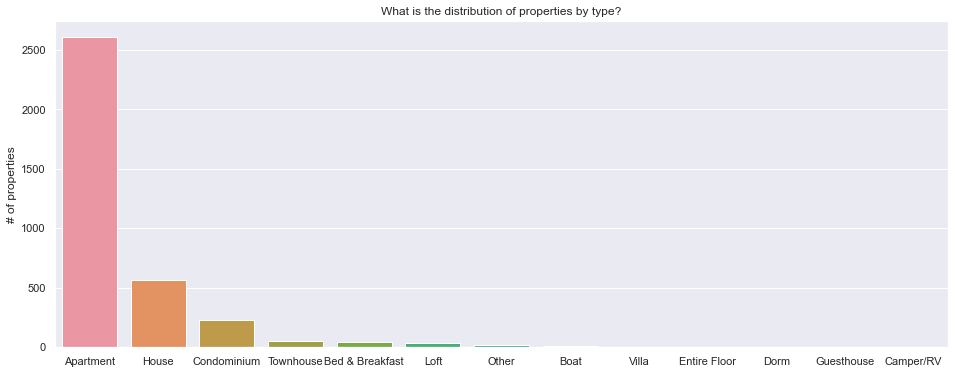

In [411]:
## Define order to plot property types
pt_order = listings['property_type'].value_counts().index

## Plot property types
plt.figure(figsize = (16,6))
sns.countplot(x = 'property_type', order = pt_order, data = listings)
plt.title('What is the distribution of properties by type?')
plt.ylabel('# of properties')
plt.xlabel('');

We can see that apartments and houses represent almost 90% of the types of properties available at AirBNB in Boston. Now, let's take a look of listings grouped by "room_type"

In [412]:
## Take a look of listings by "room_type"
listings['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

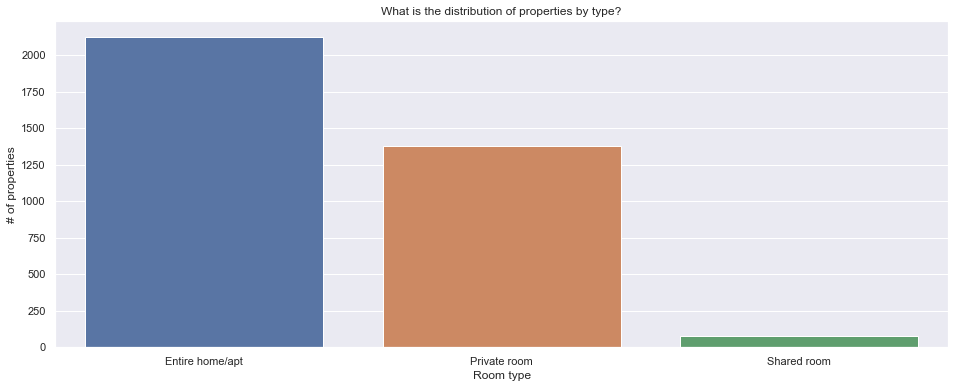

In [413]:
## Plot listings by "room_type"
plt.figure(figsize = (16,6))
sns.countplot(x = 'room_type', data = listings)
plt.title('What is the distribution of properties by type?')
plt.ylabel('# of properties')
plt.xlabel('Room type');

## Prices in listings

In [414]:
## Check "price" values
listings['price']

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

I will have to correct the datatype from a string to a numerical

In [415]:
## Convert price to a float
listings['price'] = pd.to_numeric(listings['price'].str[1:], errors='coerce').tolist()

Now that we have the right data type for "price", let's group the listings by neighbourhood and find the distribution of prices in each of them.

In [416]:
## Get median neighbourhood prices
np_df = listings[['neighbourhood_cleansed','price']].dropna().groupby('neighbourhood_cleansed').median()

## Get neighbourhoods sorted by median
n_sorted = np_df.sort_values(by=['price'], ascending=False).index
n_sorted

Index(['Leather District', 'South Boston Waterfront', 'Downtown', 'Chinatown',
       'Back Bay', 'Bay Village', 'West End', 'Beacon Hill', 'Fenway',
       'South End', 'North End', 'Charlestown', 'South Boston',
       'Jamaica Plain', 'Roxbury', 'East Boston', 'Brighton', 'Mission Hill',
       'Allston', 'West Roxbury', 'Longwood Medical Area', 'Roslindale',
       'Dorchester', 'Mattapan', 'Hyde Park'],
      dtype='object', name='neighbourhood_cleansed')

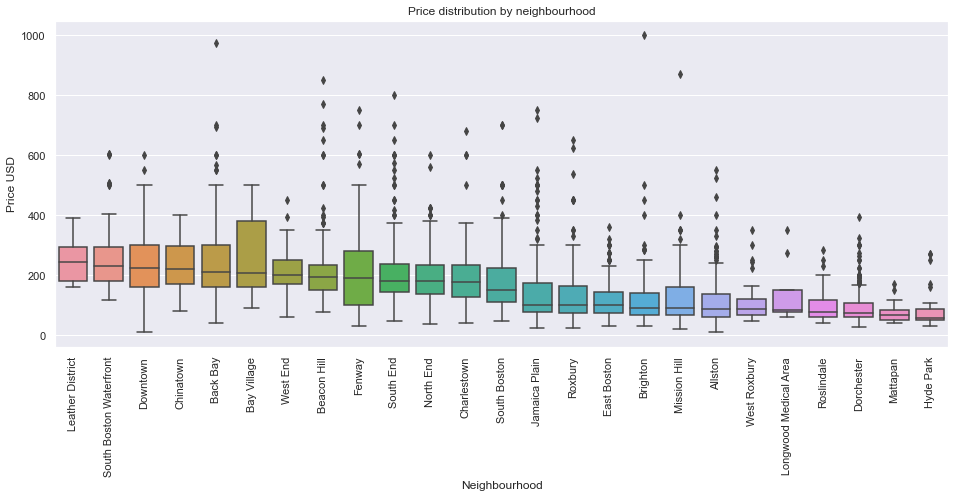

In [417]:
## Plot neighbourhoods by median price
plt.figure(figsize = (16,6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price', data = listings, order = n_sorted)
plt.title('Price distribution by neighbourhood')
plt.ylabel('Price USD')
plt.xlabel('Neighbourhood')
xt = plt.xticks(rotation=90);

We can see that the neighbourhoods that have a higher average price are concentrated near the downtown of Boston, a fact that is very common in many cities. Also, these kind of neighbourhoods don't have many outliers on their prices compared with other neighbourhoods.

Now, let's combine the amount of lisintgs per neighbourhood with two types of score that I find valuable when I book a new property in a city: location and value.

### Neighbourhoods with the best combination of location and value

In [418]:
## Create dataframe grouping averages of scores by neighbourhood
l_scores = listings.dropna(subset=['review_scores_location','review_scores_value']).groupby('neighbourhood_cleansed').agg({'review_scores_location':['mean','count'],'review_scores_value':['mean','count']}).reset_index()
l_scores.columns  = [' '.join(col).strip() for col in l_scores.columns.values]

## Filter dataframe by neighbourhoods with more than 20 properties
l_scores = l_scores[l_scores['review_scores_value count'] > 20].reset_index()

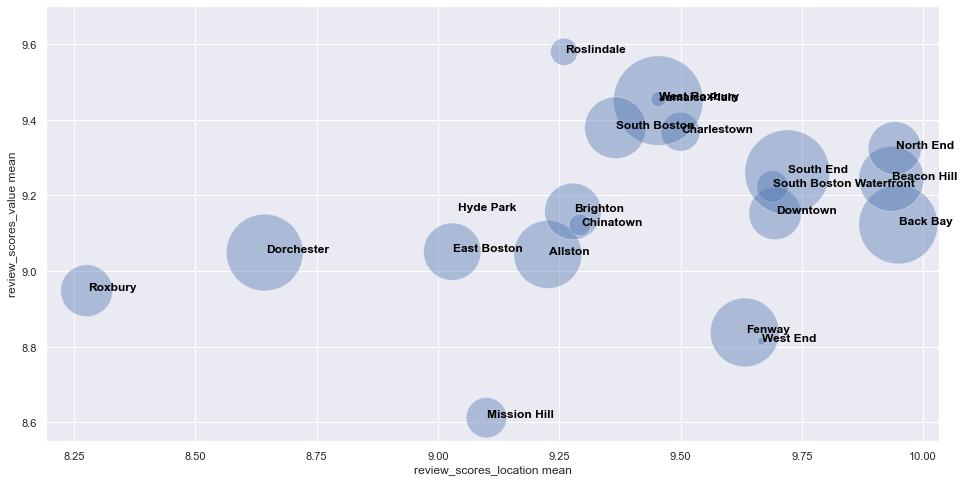

In [419]:
## Create scatterplot
plt.figure(figsize = (16,8))
p1 = sns.scatterplot(x = 'review_scores_location mean', y = 'review_scores_value mean', alpha = 0.4,
                     size = 'review_scores_value count',  sizes = (0,8000), legend = False, data = l_scores)
for line in range(0,l_scores.shape[0]):
     p1.text(l_scores['review_scores_location mean'][line]+0.002, l_scores['review_scores_value mean'][line], l_scores['neighbourhood_cleansed'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.ylim(8.55,9.7);

Based on this chart, it would be convenient to look for apartments at "North End", "Beacon Hill" and "Back Bay". This zones have the best location scores, offer great value for the money paid and are not as expensive as the downtown and offer a great amount of available properties to rent

### Conclusions to answer question 1:

After analyzing some of the main characteristics of the listings available in Boston we can answer the question with the following insights:

- Almost 90% of the listings available in Boston are houses and apartments.
- If someone is booking a property through AirBNB in Boston, it will found more options to book entire houses/apartments than rooms. However, the difference is not that big.
- If someone is looking for a listing near the downtown, it will probably be more expensive than options a little farther. However, this pricier neighbourhoods are compensated by a great location and a high score in the value received

## Question 2: Which variables can determine the price of an AirBNB listing?

Let's analyze which variables of the "listings" dataset can have an influence on price. First, we will review some of the numerical variables and how they correlate to price.

In [420]:
## Create dataframe for heatmap
h_df = listings[['price','square_feet','accommodates','bathrooms','bedrooms','beds','host_listings_count',
                 'number_of_reviews','review_scores_location','review_scores_value']]

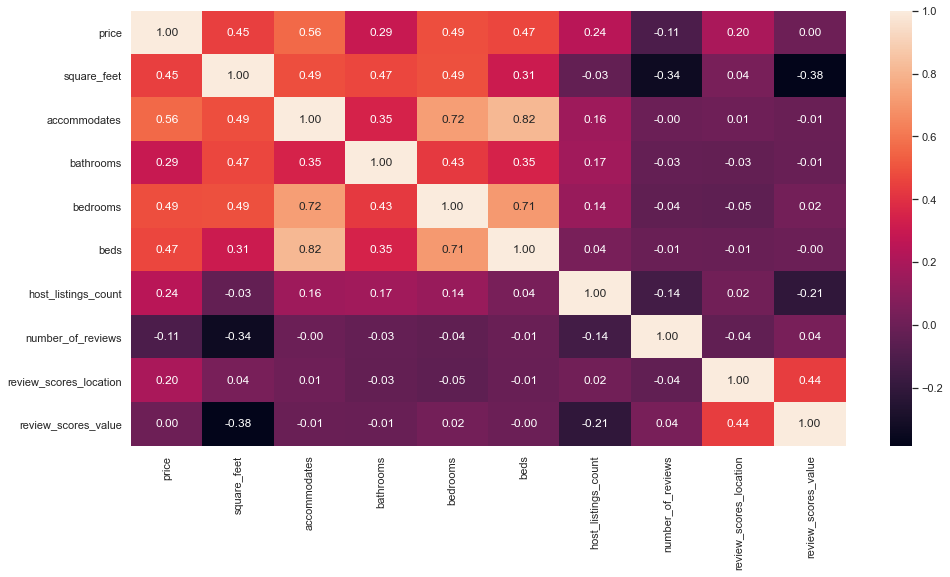

In [421]:
plt.figure(figsize = (16,8))
sns.heatmap(h_df.corr(), annot=True, fmt='.2f');

Price has a strong correlation with "accommodates", "bedrooms", "beds" and "square feet" variables. However, there is also a correlation between them, particularly between "accommodates" and "bedrooms" and "beds". This makes sense because the number of people you can accommodate in a property has a correlation with the amount of bedrooms and beds availabl in that property.

In order to avoid multicollinearity we will only use "accommodates" to start developing a regression model.

In [422]:
## Create Dataframe for model 1
m1 = h_df[['price','accommodates']].dropna()

In [423]:
## Simple Linear Regression

X = m1['accommodates'].values.reshape(-1,1)
y = m1['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

## instantiate
lm_model = LinearRegression(normalize=True)

## fit
lm_model.fit(X_train, y_train)

## predict test data
y_test_preds = lm_model.predict(X_test)

## score model on the test
r2_test = r2_score(y_test, y_test_preds)
print('Test score: ' + str(r2_test))

Test score: 0.29350807445277927


In [424]:
## Review statsmodel from the simple linear regression
X_stats = sm.add_constant(X_train)
model = sm.OLS(y_train, X_stats)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          2.82e-218
Time:                        16:09:38   Log-Likelihood:                -14861.
No. Observations:                2501   AIC:                         2.973e+04
Df Residuals:                    2499   BIC:                         2.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.3421      3.668     16.179      0.0

We can see that "accommodates" cannot predict by itself the price of a property. We will add more numerical features such as "host_listings_count" and "review_scores_location" and run a Multiple Linear Regression

In [425]:
## Create Dataframe for multiple linear regression
m3 = h_df[['price','accommodates','host_listings_count','review_scores_location']].dropna()
m3.shape

(2760, 4)

In [426]:
## Multiple Linear Regression
X = m3[['accommodates','host_listings_count','review_scores_location']]
y = m3['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

## instantiate
lm_model = LinearRegression(normalize=True)

## fit
lm_model.fit(X_train, y_train)

## predict test data
y_test_preds = lm_model.predict(X_test)

## score model on the test
r2_test = r2_score(y_test, y_test_preds)
print('Test score: ' + str(r2_test))

Test score: 0.4372982873759874


In [427]:
## Review statsmodel from the multiple linear regression
X_stats = sm.add_constant(X_train)
model = sm.OLS(y_train, X_stats)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     477.3
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          6.84e-232
Time:                        16:09:38   Log-Likelihood:                -11292.
No. Observations:                1932   AIC:                         2.259e+04
Df Residuals:                    1928   BIC:                         2.261e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -169

We can see that adding those additional variables improved the model. However, there are still some categorical variables I haven't include in the model and may have an impact in the price such as "neighbourhood_cleansed", "property_type", "room_type", and "host_is_superhost".

### Include categorical variables in the analysis

In [428]:
## Prepare Dataframe for Multiple Linear Regression with numerical and categorical variables
## Numerical columns selected: 'accommodates','host_listings_count','review_scores_location'
## Categorical variables selected: 'neighbourhood_cleansed','property_type','room_type','host_is_superhost'
m_df = listings[['price','accommodates','host_listings_count','review_scores_location',
                'neighbourhood_cleansed','property_type','room_type','host_is_superhost']].dropna().reset_index()
m_df.shape

(2758, 9)

The column 'neighbourhood_cleansed' has to many categories, we will group them by making the following assumptions:
1. Price becomes higher when the property is closer to Downtown
2. We will clasify each neighbourhood based on its distance to the Downtown:
    - Less than 1 mile away from Downtown = 'Very Short'
    - Between 1 and 2 miles = 'Short'
    - Between 2 and 5 miles = 'Medium'
    - More than 5 miles = 'Far'
    
*The distance from each neighbourhood to the Downtown was taken manually from Google Maps

In [429]:
## Create dataframe with the clasification of each neighbourhood
distance = {'neighbourhood': ['Jamaica Plain','South End','Back Bay','Fenway','Dorchester','Allston','Beacon Hill',
                             'Brighton','South Boston','Downtown','East Boston','Roxbury','North End','Mission Hill',
                             'Charlestown','South Boston Waterfront','Chinatown','Roslindale','West End',
                             'West Roxbury','Hyde Park','Mattapan','Bay Village','Longwood Medical Area',
                             'Leather District'],
            'distance from downtown' : ['Far','Medium','Short','Medium','Far','Far','Short','Far','Medium',
                                       'Very Short','Medium','Far','Very Short','Medium','Medium','Short','Far',
                                       'Far','Short','Far','Far','Far','Short','Medium','Very Short']}

distance_df = pd.DataFrame(data = distance).set_index('neighbourhood')
distance_df

,distance from downtown
neighbourhood,
Jamaica Plain,Far
South End,Medium
Back Bay,Short
Fenway,Medium
Dorchester,Far
Allston,Far
Beacon Hill,Short
Brighton,Far
South Boston,Medium


In [430]:
## Join the original Dataframe with the clasification by neighbourhood
m4 = m_df.join(distance_df, on = 'neighbourhood_cleansed', how = 'inner')
m4 = m4.drop(columns = ['neighbourhood_cleansed','index']).dropna()
m4.head()

,price,accommodates,host_listings_count,review_scores_location,property_type,room_type,host_is_superhost,distance from downtown
0,65.0,2,1,9.0,Apartment,Private room,f,Far
1,65.0,2,1,9.0,Apartment,Private room,t,Far
2,75.0,4,1,10.0,House,Private room,f,Far
3,79.0,2,1,9.0,House,Private room,t,Far
4,75.0,2,2,9.0,Condominium,Private room,t,Far


In [431]:
## Set numerical and categorical columns
num_cols = ['accommodates','host_listings_count','review_scores_location']
cat_cols = ['property_type','room_type','host_is_superhost','distance from downtown']

fm_df = m4
for col in cat_cols:
    fm_df = pd.concat([fm_df.drop(col, axis = 1),
                      pd.get_dummies(fm_df[col], prefix = col, prefix_sep = '_', dummy_na = True)], axis = 1)
fm_df.head()

,price,accommodates,host_listings_count,review_scores_location,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,...,room_type_Shared room,room_type_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,distance from downtown_Far,distance from downtown_Medium,distance from downtown_Short,distance from downtown_Very Short,distance from downtown_nan
0,65.0,2,1,9.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,65.0,2,1,9.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,75.0,4,1,10.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,79.0,2,1,9.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,75.0,2,2,9.0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [432]:
## Run Multiple Linear Regression

y = fm_df['price']
X = fm_df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

## instantiate
lm_model = LinearRegression(normalize=True)

## fit
lm_model.fit(X_train, y_train)

## predict test data
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)

## score model on train
r2_train = r2_score(y_train, y_train_preds)
print('Train score: ' + str(r2_train))

## score model on the test
r2_test = r2_score(y_test, y_test_preds)
print('Test score: ' + str(r2_test))

Train score: 0.5537936901455979
Test score: 0.5274576656519115


In [433]:
## Review statsmodel from the multiple linear regression
X_stats = sm.add_constant(X_train)
model = sm.OLS(y_train, X_stats)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     118.5
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          2.18e-316
Time:                        16:09:39   Log-Likelihood:                -11055.
No. Observations:                1930   AIC:                         2.215e+04
Df Residuals:                    1909   BIC:                         2.227e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

/Users/juliocesarvaldeztalavera/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


We can see that adding categorical variables added robustness to the model. However it's still not that good.

## Conclusions to answer question 2

After the analysis we can have the following conclusions:
- The number of accommodates has a positive correlation with price. Thus, an increase in the number of people that can stay at a property increases the price of it.
- Renting an entire home/apt is associated with a high price of the property, which makes sense since this option offers bigger spaces and privacy that private rooms or shared rooms.
- Properties that are closer to the Downtown are more associated with a higher price. Probably this is due to the convenience of its location for tourists. On the opposite, properties that are considered far from the Downtown are usually more cheaper.

Even though we have some conclusions based on this model, it could be improved by adding aditional variables to it that may not be available in this dataset. In a future project, we could analyze the ammenities offered by the properties and see if they have any sort of correlation with price.

## When is the best time to find more properties available in Boston?

To solve this question we can use the calendar dataset and plot the availability by date (# properties available on a given date / # of properties). We will find the mean availability by date and then the mean availability grouped by month.

In [459]:
## Take a look at calendar dataset
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [460]:
calendar.shape

(1308890, 4)

In [461]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [462]:
## Review data types
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [463]:
## Change 'date' from object to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

In [464]:
## Use "date" as index for the dataset
ts = calendar.set_index('date')
ts.head()

,listing_id,available,price
date,,,
2017-09-05,12147973,f,NaN
2017-09-04,12147973,f,NaN
2017-09-03,12147973,f,NaN
2017-09-02,12147973,f,NaN
2017-09-01,12147973,f,NaN


In [465]:
## Check if every listing has a similar number of entries
ts['listing_id'].value_counts()

12898806    730
14710769    365
7018497     365
3946215     365
951473      365
           ... 
13951039    365
13512551    365
5270703     365
901914      365
3250739     365
Name: listing_id, Length: 3585, dtype: int64

In [466]:
## Drop the property with "listing_id" = 12898806
ts = ts[ts['listing_id'] != 12898806]

In [467]:
## Replace the values in "available" with 1 for 't' and 0 for 'f'
new_calendar = ts.replace({'f':0, 't':1})
new_calendar.available.value_counts()

0    665283
1    642877
Name: available, dtype: int64

In [468]:
## group the availability by date
ts1 = new_calendar.groupby(by = 'date').agg({'available':['count','sum','mean']})
ts1.columns = ts1.columns.get_level_values(1)
ts1.head()

,count,sum,mean
date,,,
2016-09-06,3584,568,0.158482
2016-09-07,3584,930,0.259487
2016-09-08,3584,997,0.278181
2016-09-09,3584,979,0.273158
2016-09-10,3584,954,0.266183


### Plot the availability by date

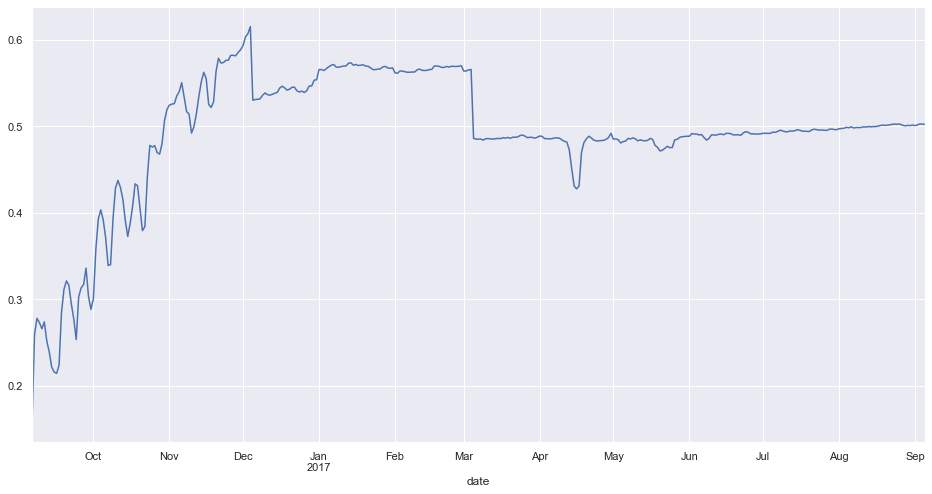

In [447]:
plt.figure(figsize = (16,8))
ts1['mean'].plot(linewidth = 1.5);

This plot doesn't tell me to much information, probably is better to look at this information at a monthly level.

In [469]:
## Group results by month
new_calendar['month_number'] = pd.DatetimeIndex(new_calendar.index).month
new_calendar['month'] = pd.DatetimeIndex(new_calendar.index).month_name()
new_calendar.head()

,listing_id,available,price,month_number,month
date,,,,,
2017-09-05,12147973,0,NaN,9,September
2017-09-04,12147973,0,NaN,9,September
2017-09-03,12147973,0,NaN,9,September
2017-09-02,12147973,0,NaN,9,September
2017-09-01,12147973,0,NaN,9,September


In [470]:
## Drop "price" column and NaN values
new_calendar = new_calendar.reset_index().set_index('listing_id')
new_calendar = new_calendar[['date','available','month_number','month']].dropna()
new_calendar.head()

,date,available,month_number,month
listing_id,,,,
12147973,2017-09-05,0,9,September
12147973,2017-09-04,0,9,September
12147973,2017-09-03,0,9,September
12147973,2017-09-02,0,9,September
12147973,2017-09-01,0,9,September


In [471]:
## Group ts2 by month and sort the information by month_number
ts2 = new_calendar.groupby(['month','month_number'])['available'].mean().reset_index()
ts2 = ts2.sort_values('month_number').set_index('month_number')
ts2.head()

,month,available
month_number,,
1,January,0.568665
2,February,0.566107
3,March,0.496661
4,April,0.477883
5,May,0.482431


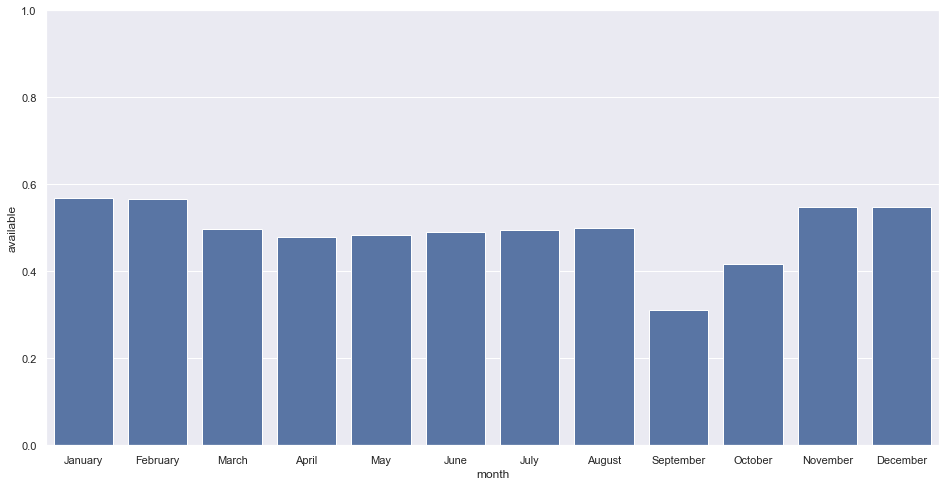

In [472]:
## Plot the availability by month
plt.figure(figsize = (16,8))
sns.barplot(x = 'month', y = 'available', color = 'b', data = ts2)
plt.ylim(0,1);

## Conclusions to answer question 3

The dataset available is not the ideal one. Ideally it would be better to have information from many years or at least all the months from a selected year. In this case we are using information from Sep. 16 to Sep.17 and this will affect some of the conclusions:

- At any given month of the year, between 40%-60% of properties in Boston will be available. The only exception for this is September. However, for this month there is mixed information from 2016 and 2017, so probably we should take a look from a dataset that evaluates a whole year.

- The months in which there is more availabily of properties in Boston (close to 60%) is between November and February. This may be related to the season, in colder months proably Boston receives less visitors that look to rent properties through AirBNB.